# Team id: PNT2022TMID36983

# IBM PROJECT 2022

#IMPORT LIBRARIES

In [2]:
pwd

'/home/wsuser/work'

In [3]:
!pip install keras==2.2.4
!pip install tensorflow
!pip install numpy

     |████████████████████████████████| 312 kB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 18.2 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 1.3 MB 20.9 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [4]:
#for working with arrays
import numpy as np
#open source used for both ML and DL for computation
import tensorflow
#mnist dataset
from tensorflow.keras.datasets import mnist
#it is a plain stack of layers
from tensorflow.keras.models import Sequential
#A Layer consists of a tensor- in tensor-out computat ion function
from tensorflow.keras import layers
#Dense-Dense Layer is the regular deeply connected layers
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Dense, Flatten 
#Convolutional Layer
from tensorflow.keras.layers import Conv2D 
#Used for one-hot encoding
from keras. utils import np_utils
#for data visualization
import matplotlib.pyplot as plt

#LOADING DATA

In [5]:
#splitting the mnist data into train and test
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
#shape is used for give the dimension values #60000-rows 28x28-pixels
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

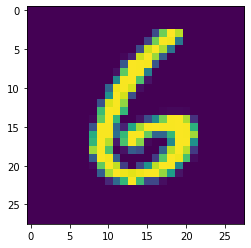

In [8]:
#Plotting the image
plt.imshow(x_train[6000])

In [9]:
np.argmax(y_train[6000])

0

#Reshaping dataset

In [10]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [11]:
#Storing number of classes in a variable
number_of_classes = 10

In [12]:
#converts the output in binary format
y_train = np_utils.to_categorical (y_train, number_of_classes)
y_test = np_utils.to_categorical (y_test, number_of_classes)

#Add CNN Layers

In [13]:
#create model
model=Sequential ()

In [14]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [15]:
#flatten the dimension of the image
model.add(Flatten())

In [16]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

#Compiling the model

In [17]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

#Training the model

In [18]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 116s 61ms/step - loss: 0.1835 - accuracy: 0.9554 - val_loss: 0.0853 - val_accuracy: 0.9731
Epoch 2/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0655 - accuracy: 0.9802 - val_loss: 0.0904 - val_accuracy: 0.9721
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0806 - val_accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.1063 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.1065 - val_accuracy: 0.9755


In [19]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10647186636924744, 0.9754999876022339]


In [20]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

[[2.8257352e-15 3.8920937e-12 3.4901258e-17 9.5643159e-08 8.2597093e-05
  1.3513713e-09 1.1154587e-12 1.3680778e-06 6.3232153e-09 9.9991596e-01]]


In [21]:
#printing our Labels from first 4 images
import numpy as np
print(np.argmax(prediction, axis=1))

[9]


In [22]:
#Printing the actual labels
np.argmax(y_test[6000:6001])

9

#Save the model

In [24]:
# Save the model
model.save('mnistCNN.h5')

In [25]:
!tar -zcvf handwritten-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [26]:
ls -1

handwritten/
handwritten-model_new.tgz
mnistCNN.h5


In [27]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.1 MB/s eta 0:00:01


In [29]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url":"https://us-south.ml.cloud.ibm.com",
                   "apikey":"Ng-dOM88M0xel7_C2vWXwLR0mPlNgCJRbnXJu4TNg-sP"                  
                  }
client = APIClient(wml_credentials)

In [30]:
client = APIClient(wml_credentials)

In [35]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [36]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = "+ space_uid)

Space UID = c3803a62-7d77-4c36-8b91-12684f81243c


In [37]:
client.set.default_space(space_uid)

'SUCCESS'

In [39]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [51]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [54]:
model_details = client.repository.store_model(model='handwritten-model_new.tgz', meta_props={
client.repository.ModelMetaNames.NAME: "CNN", 
client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",   
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [55]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T13:08:19.466Z',
  'id': '9b33597e-9f93-47a6-8b60-7e9c07a30c7f',
  'modified_at': '2022-11-19T13:08:21.422Z',
  'name': 'CNN',
  'owner': 'IBMid-668000CYW6',
  'resource_key': 'cd4316d6-e97e-40d2-bad4-5c8e6907e22a',
  'space_id': 'c3803a62-7d77-4c36-8b91-12684f81243c'},
 'system': {'warnings': []}}

In [56]:
model_details = client.repository.get_model_id(model_details)
model_details

'9b33597e-9f93-47a6-8b60-7e9c07a30c7f'

In [58]:
client.repository.download(model_id,'Handwritten_recognition_IBM.tar.gz')

Successfully saved model content to file: 'Handwritten_recognition_IBM.tar.gz'


'/home/wsuser/work/Handwritten_recognition_IBM.tar.gz'

In [59]:
ls

DigitRecog_IBM_model.tar.gz  handwritten-model_new.tgz           mnistCNN.h5
handwritten/                 Handwritten_recognition_IBM.tar.gz


# Testing the model

In [60]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [61]:
model = load_model("mnistCNN.h5")

In [63]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']


In [64]:
img = Image.open(streaming_body_1).convert("L")
img = img.resize( (28,28) )
img

In [65]:
im2arr = np.array(img)
im2arr = im2arr.reshape(1, 28, 28, 1)

In [66]:
pred = model.predict(im2arr)
print(pred)

[[1.0000000e+00 2.8967338e-14 7.1253406e-11 1.0437016e-16 6.6939720e-14
  3.4915980e-13 2.4058176e-11 1.0207940e-14 4.1624935e-09 2.3613622e-13]]


In [67]:
print(np.argmax(pred, axis=1))

[0]
